In [4]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from textblob import TextBlob
from spacy_langdetect import LanguageDetector
import spacy

In [5]:
# fetch all csv file paths
csv_file_path_list = glob.glob("/Users/Shared/github_projects/Second-Hand-Arbitrage/csv files/*")

In [6]:
# create dataframe shell and append all csv contents
csv_df = pd.DataFrame(columns=["url", "title", "price", "date"])

for csv_path in csv_file_path_list:
    csv = pd.read_csv(csv_path, names=["url", "title", "price", "date"])
    csv_df = csv_df.append(csv)

In [7]:
# remove data for dates where entries are under 100 (these are outliers where scrapping did not fully complete)
csv_df_reject = csv_df.groupby(csv_df["date"]).count() < 100
rejected_dates = csv_df_reject.index[csv_df_reject['url'] == True].tolist()
csv_df_valid_dates = csv_df[~csv_df["date"].isin(rejected_dates)]

<AxesSubplot:xlabel='date'>

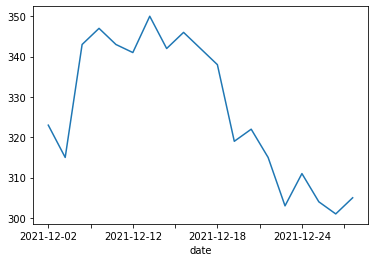

In [8]:
# display the number of of offers for a given date
csv_df_valid_dates.groupby(csv_df_valid_dates["date"]).count().url.plot()

In [31]:
text_content = csv_df_valid_dates.title.tolist()[3]
print(text_content)

Objektiv Canon EF 100mm 1:2. 8L Makro


In [70]:
text_content = csv_df_valid_dates.url.tolist()[2]
print(text_content)

/fr/a/canon-50mm-1.8-ef-1193903100/


In [88]:
#nlp = spacy.blank('de')
nlp = spacy.load('en_core_web_sm')  # 1
#text_content = "Er lebt mit 1 Eltern und seiner Schwester in Berlin."
doc = nlp(text_content) #3

In [89]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

Canon       PROPN     compound  
Objektiv    PROPN     compound  
EF          PROPN     ROOT      
50          NUM       nummod    
mm          NOUN      appos     
f/1.2L      NOUN      punct     
USM         ADV       ROOT      


In [90]:
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Canon Objektiv EF ORG


In [23]:
from spacy.language import Language
from spacy_langdetect import LanguageDetector

#@Language.factory("language_detector")
#def get_lang_detector(nlp, name):
#    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
doc = nlp(text_content)
nlp.add_pipe('language_detector', last=True)
for token in doc:
    print(token.text)

    print(token._.language)

Canon
en
{'language': 'it', 'score': 0.9999946762663323}
Objektiv
de
{'language': 'hr', 'score': 0.9999955042462709}
EF


TranslatorError: Must provide a string with at least 3 characters.

In [21]:
from textblob import TextBlob

In [41]:
lang = TextBlob(text_content)
lang
#print(lang.detect_language())
#print(lang.translate(from_lang='de',to='en'))

TextBlob("Objektiv Canon EF 100mm 1:2. 8L Makro")

In [43]:
from langdetect import DetectorFactory, detect, detect_langs
text = "My lubimy mleko i chleb."
detect(text_content) #  'cs'
detect_langs(text_content)  # [cs:0.7142840957132709, pl:0.14285810606233737, sk:0.14285779665739756]

[hr:0.8571397883764063, sl:0.1428601610015285]

In [69]:
import langid
langid.set_languages(['de', 'fr','it','en'])  # ISO 639-1 codes
lang, score = langid.classify('Wenig gebrauchtes Objektiv. Keine Kratzer, keine Schäden. NP 925.-, 06.2017')
print(lang, score) # en

de -168.32920455932617


In [59]:

for token in doc:
    if len(token)> 3 and token.is_alpha:
        print(token)

Canon
Objektiv


In [71]:
text_content

'/fr/a/canon-50mm-1.8-ef-1193903100/'

In [79]:
urls = list(set(csv_df_valid_dates.url.tolist()))

In [80]:
with open('/Users/Shared/github_projects/Second-Hand-Arbitrage/metadata/product_page_urls.csv', "a") as url_file:
    for url in urls:
        url_file.write(url + "\n")

In [81]:
product_page_urls_path = '/Users/Shared/github_projects/Second-Hand-Arbitrage/metadata/product_page_urls.text'
product_page_urls_df = pd.read_csv(product_page_urls_path, names=["url"])

In [82]:
product_page_urls_df

,url
0,/fr/a/canon-ef-50mm-f-1.8-ii-1190552364/
1,/fr/a/canon-ef-50mm-f-1.8-ii-1194236052/
2,/fr/a/canon-ef-24-70mm-f-4-l-is-usm-1188867838/
3,/fr/a/canon-ef-s-4-5.6-55-250-mm-is-ii-1193720...
4,/fr/a/restposten-sonnenblende-ew-63c-ew63c-119...
...,...
574,/fr/a/canon-eos-1200d-ef-s-18-55mm-is-ii-kit-t...
575,/fr/a/canon-eos-500d-kit-ef-s-18-55-mm-f-1-118...
576,/fr/a/zoomobjektiv-tamron-zu-canon-ef-1194189522/
577,/fr/a/canon-ef-s-18-55mm-objektiv-1186687780/


In [84]:
list_of_files = glob.glob('/Users/Shared/github_projects/Second-Hand-Arbitrage/csv files/*') # * means all if need specific format then *.csv
latest_file_path = max(list_of_files, key=os.path.getctime)
latest_file_df = pd.read_csv(latest_file_path, names=["url", "title", "price", "date"])

In [90]:
latest_file_df[["url"]]

,url
0,/fr/a/sigma-8-16mm-f-4-5-5-6-canon-ef-s-mount-...
1,/fr/a/canon-objektiv-ef-50mm-f-1.2l-usm-119392...
2,/fr/a/canon-objektiv-ef-75-300mm-und-autofokus...
3,/fr/a/1xcanon-ef-1x-canon-efs-objektiv-1194434...
4,/fr/a/canon-lens-cap-e-145-ef-300-f2.8-lis-usm...
...,...
310,/fr/a/metabones-speed-booster-ef-zu-mft-119281...
311,/fr/a/eos-ef-rf-adapter-(-viltrox)-1193462204/
312,/fr/a/72mm-makro-umkehr-ring-canon-eos-1186814...
313,/fr/a/72mm-makro-umkehr-ring-canon-eos-1186814...


In [98]:
new_product_page_urls = list(set(pd.merge(latest_file_df, product_page_urls_df, how='outer',
indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])["url"].to_list()))

In [101]:
new_product_page_urls

['/fr/a/tamron-70-300mm-4-5.6-ef-1193246790/',
 '/fr/a/canon-ef-100-400mm-f-4.5-5.6l-is-ii-usm-1194391184/',
 '/fr/a/canon-eos-100d-lens-macro-ef-s-60mm-1194511192/',
 '/fr/a/sigma-objektiv-dc-os-hsm-macro-17-70mm-1194428802/',
 '/fr/a/canon-ef-s-60mm-f-2.8-usm-macro-objektiv-1190215530/',
 '/fr/a/canon-objektiv-ef-75-300mm-und-autofokus-1194244370/',
 '/fr/a/canon-ef-s-10-18-is-stm-(!)-filter-sb-1194524908/',
 '/fr/a/original-canon-adapter-ef-eos-m-1194383406/',
 '/fr/a/gegenlichtblende-typ-ew-83e-fuer-canon-1194344250/',
 '/fr/a/canon-ef-70-200mm-f-2.8l-is-iii-usm-1194448828/',
 '/fr/a/canon-ef-100mm-f-2.8-l-macro-is-usm-1194509420/',
 "/fr/a/convertisseur-d'objectif-fd-a-eos-ef-1194379408/",
 '/fr/a/canon-ef-50mm-f-1.4-usm-objektiv-1194409640/',
 '/fr/a/canon-ef-m-55-200-mm-4-5-6-3-is-stm-1194384906/',
 '/fr/a/canon-lens-ef-28mm-f-2.8-is-usm-1194495550/',
 '/fr/a/canon-eos-750d-ef-s-18-55-mm-1194389560/',
 '/fr/a/canon-lens-cap-e-145-ef-300-f2.8-lis-usm-1194435410/',
 '/fr/a/canon-e